# Zomato Restaurant
Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name


In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [66]:
df1=pd.read_excel("Country-Code.xlsx")
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   int32  
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   int32  
 4   City                  9551 non-null   int32  
 5   Address               9551 non-null   int32  
 6   Locality              9551 non-null   int32  
 7   Locality Verbose      9551 non-null   int32  
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   int32  
 11  Average Cost for two  9551 non-null   float64
 12  Currency              9551 non-null   int32  
 13  Has Table booking     9551 non-null   int32  
 14  Has Online delivery   9551 non-null   int32  
 15  Is delivering now    

In [26]:
df2=pd.read_csv("zomato.csv", encoding='ISO-8859-1')
df2.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8801,162,Phillipines,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",6721.0,Indian Rupees(Rs.),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


# Merging df1 and df2

In [60]:
df=pd.merge(df1,df2,on =['Country Code'])
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [61]:
df['Currency'].unique()

array(['Indian Rupees(Rs.)', 'Dollar($)', 'Brazilian Real(R$)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Botswana Pula(P)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)', 'Emirati Diram(AED)', 'Pounds(\x8c£)'],
      dtype=object)

# Converting all currency to Indian Rupee

In [62]:
currency_convertor={'Indian Rupees(Rs.)':1,'Dollar($)':83.40, 'Brazilian Real(R$)':16.46,
       'Indonesian Rupiah(IDR)':0.0052, 'NewZealand($)':49.84, 'Botswana Pula(P)':6.11,
       'Qatari Rial(QR)':22.90, 'Rand(R)':4.44, 'Sri Lankan Rupee(LKR)':0.28,
       'Turkish Lira(TL)':2.60, 'Emirati Diram(AED)':22.71, 'Pounds(\x8c£)':104.93}
def conversion (row,currency_convertor):

    indian_rupee='Indian Rupees(Rs.)'
    if row['Currency'] in currency_convertor:
        row['Average Cost for two']=row['Average Cost for two']*currency_convertor[row['Currency']]
    row['Currency']=indian_rupee
    return row
df=df.apply(lambda x: conversion(x,currency_convertor),axis=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Shorts Burger and Shine'),
  Text(1, 0, 'Braseiro da Gíçvea'),
  Text(2, 0, 'Masala Library'),
  Text(3, 0, 'CakeBee'),
  Text(4, 0, 'Cube - Tasting Kitchen'),
  Text(5, 0, 'Atlanta Highway Seafood Market'),
  Text(6, 0, 'Carnival By Tresind'),
  Text(7, 0, "Mama's Fish House"),
  Text(8, 0, "Pom Pom's Teahouse and Sandwicheria"),
  Text(9, 0, "Rae's Coastal Cafe")])

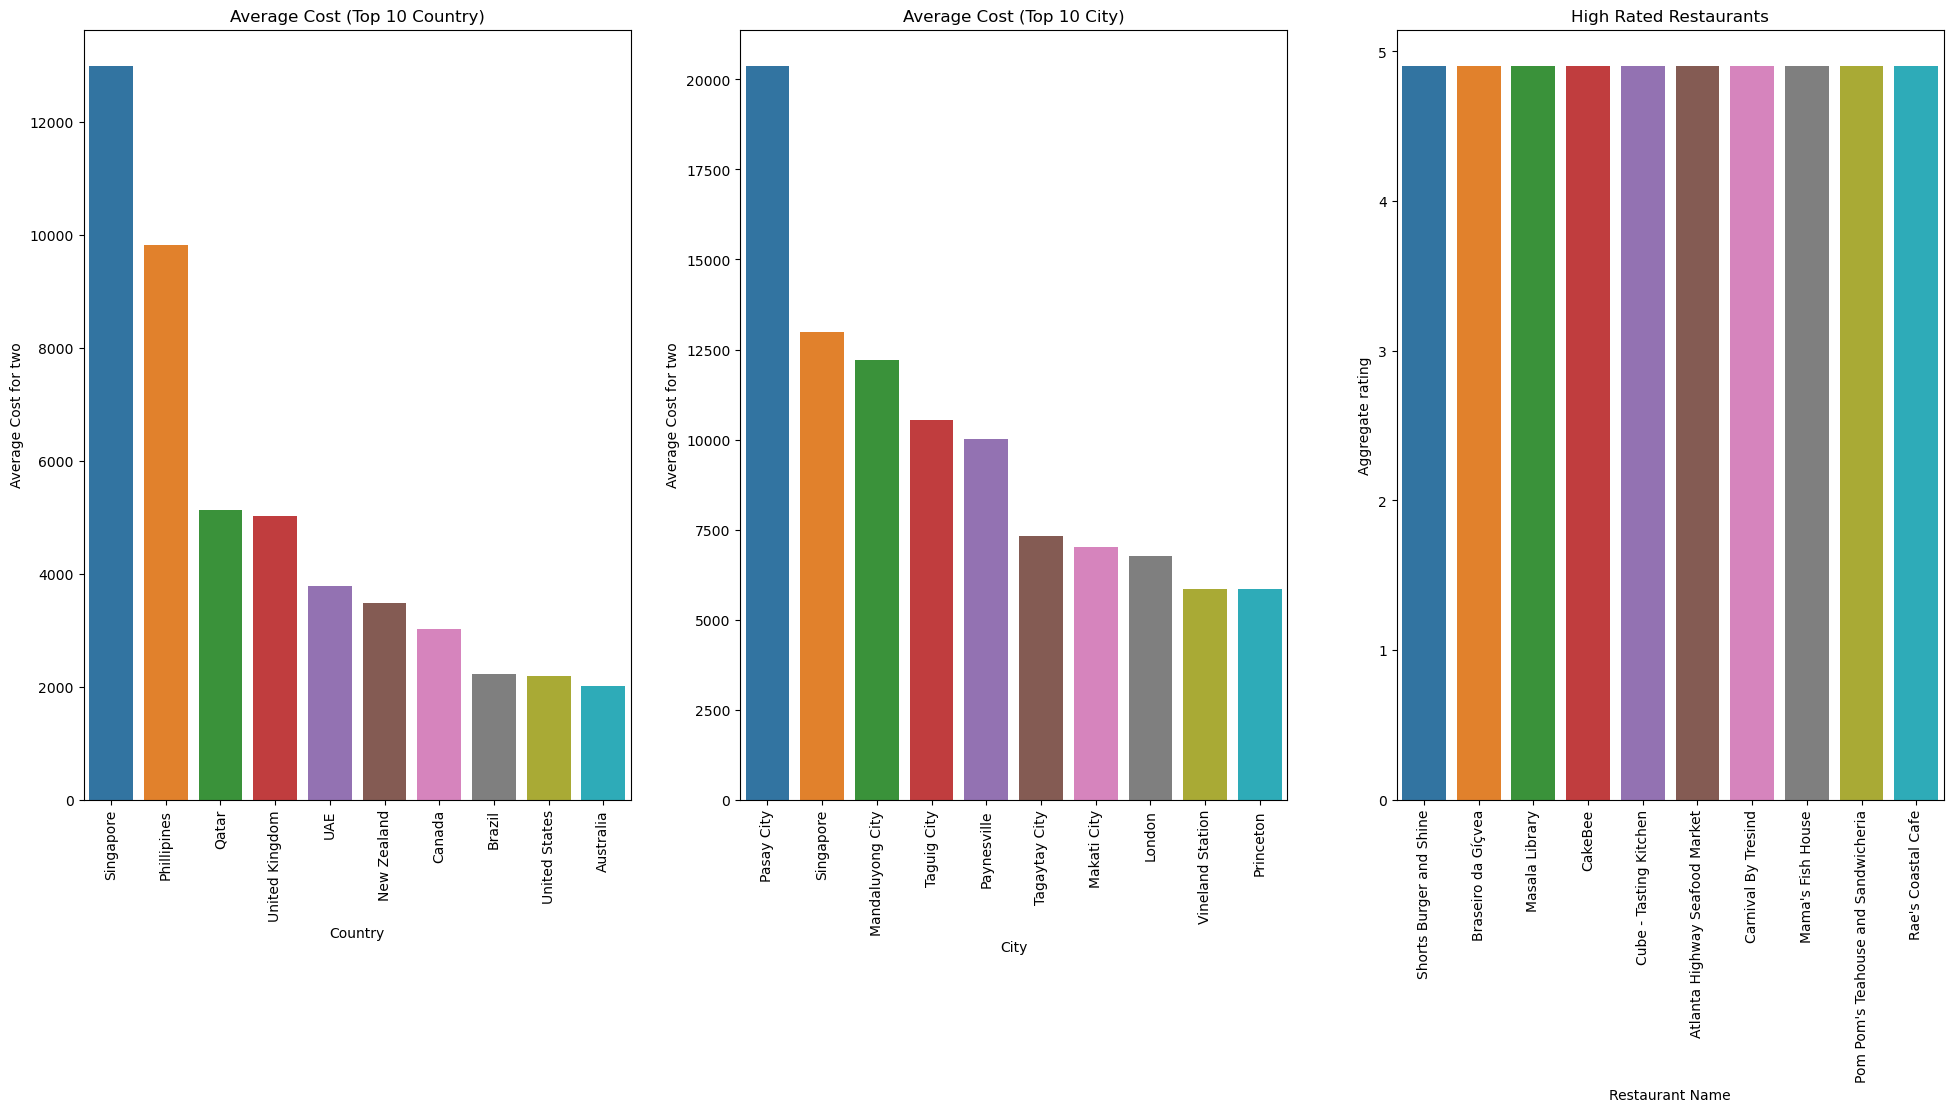

In [63]:
plt.figure(figsize=(24,10))
plt.subplot(1,3,1)
df_cost_country=df.groupby('Country').agg({'Average Cost for two':'mean'}).sort_values(by='Average Cost for two').nlargest(10,columns='Average Cost for two').reset_index()
sns.barplot(x='Country',y='Average Cost for two',data=df_cost_country) 
plt.title('Average Cost (Top 10 Country)')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
df_cost_city=df.groupby('City').agg({'Average Cost for two':'mean'}).sort_values(by='Average Cost for two').nlargest(10,columns='Average Cost for two').reset_index()
sns.barplot(x='City',y='Average Cost for two',data=df_cost_city) 
plt.title('Average Cost (Top 10 City)')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
df_rated=df.groupby('Restaurant Name').agg({'Aggregate rating':'mean'}).sort_values(by='Aggregate rating').nlargest(10,columns='Aggregate rating').reset_index()
sns.barplot(x='Restaurant Name',y='Aggregate rating',data=df_rated) 
plt.title('High Rated Restaurants')
plt.xticks(rotation=90)

# Price range -Classification Problem

In [67]:
df['Price range']=df['Price range'].astype('object')
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object' :
        df[col]=le.fit_transform(df[col])


In [68]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=df.drop(['Price range'],axis=1)
y_class=df['Price range']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [69]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test)

In [70]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [71]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [72]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelXGC, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.663
Precision Score: 0.663
Recall Score: 0.663
F1_Score: 0.658683
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.108
Precision Score: 0.488
Recall Score: 0.108
F1_Score: 0.094416
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.109
Precision Score: 0.489
Recall Score: 0.109
F1_Score: 0.095779
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.136
Precision Score: 0.507
Recall Score: 0.136
F1_Score: 0.117078
-------------------------------------------------------------------------------------------------------

In [73]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,LogisticRegression,0.663,0.663,0.663,0.658683
1,KNeighborsClassifier,0.598,0.598,0.593,0.592146
2,ExtraTreesRegressor,0.193,0.193,0.551,0.178807
3,RandomForestClassifier,0.136,0.136,0.507,0.117078
4,GradientBoostingClassifier,0.110,0.110,0.489,0.097274
5,XGBClassifier,0.109,0.109,0.488,0.095801
6,BaggingClassifier,0.109,0.109,0.489,0.095779
7,DecisionTreeClassifier,0.108,0.108,0.488,0.094416


# Logistic Regression is the best model for classification.

In [74]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['Average Cost for two'],axis=1)
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6685, 21), (2866, 21), (6685,), (2866,))

In [75]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test) 

In [76]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [77]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [78]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 351.122
Mean Squared Error (MSE): 439723.977
Root Mean Squared Error (RMSE): 663.117
R2_score: 0.600805
Root Mean Squared Log Error (RMSLE): 6.497
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.599925
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 201.732
Mean Squared Error (MSE): 460717.882
Root Mean Squared Error (RMSE): 678.762
R2_score: 0.581746
Root Mean Squared Log Error (RMSLE): 6.52
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.580824
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 160.398
Mean Squared Error (MSE): 272451.161
Root Mean Squared Error (RMSE): 521.969
R2_score: 0.752661
Root Mean Squared Log Error (RMSLE): 6.258
Mean Absolute Per

In [79]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.813580,158.684269,452.653828,inf,204895.488017,6.115128,0.813990
1,XGBRegressor,0.752994,172.081777,521.043231,inf,271486.048096,6.255833,0.753537
2,RandomForestRegressor,0.752116,160.398191,521.968544,inf,272451.160714,6.257607,0.752661
3,BaggingRegressor,0.694475,167.413911,579.486206,inf,335804.262692,6.362142,0.695147
4,GradientBoostingRegressor,0.680801,187.631175,592.311474,inf,350832.882255,6.384033,0.681503
5,KNeighborsRegressor,0.610784,247.256371,654.056370,inf,427789.735773,6.483194,0.611640
6,Ridge Regression,0.607416,349.359777,656.879962,inf,431491.284661,6.487501,0.608279
7,Lasso Regression,0.601391,349.934193,661.900680,inf,438112.510290,6.495116,0.602268
8,LinearRegression,0.599925,351.121999,663.116865,inf,439723.976934,6.496951,0.600805
9,DecisionTreeRegressor,0.580824,201.732383,678.762022,NaN,460717.882485,6.520271,0.581746


# From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
1. ExtraTreesRegressor 2. XGBRegressor 3. RandomForestRegressor